In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv('tennis.csv')
data_encoded = pd.get_dummies(data, columns=['outlook', 'temp', 'humidity', 'windy'])
X = data_encoded.drop('play', axis=1)
y = data_encoded['play']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Helper functions
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return model, accuracy

def visualize_tree(model, feature_names, class_names):
    plt.figure(figsize=(20,10))
    plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
    plt.show()

1. Apply the CART decision tree (with Entropy) for training with the given dataset (split it in train-test) and develop various models as.


In [15]:
def base_model():
    model = DecisionTreeClassifier(random_state=42)
    model, accuracy = train_and_evaluate(model, X_train, X_test, y_train, y_test)
    print("Base model accuracy:", accuracy)
    return model, accuracy

2. List the various pre-pruning methods which you wish to apply.



The list_pre_pruning_methods() function defines and lists the pre-pruning methods we're using:

-Max Depth
-Min Samples Split
-Min Samples Leaf
-Max Features
-Max Leaf Nodes

In [16]:
def list_pre_pruning_methods():
    pre_pruning_methods = {
        'Max Depth': DecisionTreeClassifier(max_depth=3, random_state=42),
        'Min Samples Split': DecisionTreeClassifier(min_samples_split=5, random_state=42),
        'Min Samples Leaf': DecisionTreeClassifier(min_samples_leaf=2, random_state=42),
        'Max Features': DecisionTreeClassifier(max_features=5, random_state=42),
        'Max Leaf Nodes': DecisionTreeClassifier(max_leaf_nodes=5, random_state=42)
    }
    print("Pre-pruning methods:")
    for method in pre_pruning_methods.keys():
        print(f"- {method}")
    return pre_pruning_methods

3. Apply each pre-pruning method independently and measure the performance.

In [17]:
def apply_pre_pruning_methods(pre_pruning_methods):
    results = {}
    for method, model in pre_pruning_methods.items():
        pruned_model, accuracy = train_and_evaluate(model, X_train, X_test, y_train, y_test)
        results[method] = {'model': pruned_model, 'accuracy': accuracy}
        print(f"{method} accuracy:", accuracy)
    return results

4. Display the tree for each pre-pruning outcome.

In [18]:
def display_trees(base_model, results):
    feature_names = X.columns.tolist()
    class_names = ['no', 'yes']

    print("\nBase model tree:")
    visualize_tree(base_model, feature_names, class_names)

    for method, result in results.items():
        print(f"\n{method} tree:")
        visualize_tree(result['model'], feature_names, class_names)

5. Give a comparative analysis of the performance of each pre-pruning method.

In [19]:
def comparative_analysis(base_accuracy, results):
    comparative_df = pd.DataFrame({
        'Method': ['Base Model'] + list(results.keys()),
        'Accuracy': [base_accuracy] + [result['accuracy'] for result in results.values()]
    })
    comparative_df = comparative_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)
    print("\nComparative Analysis:")
    print(comparative_df)

    plt.figure(figsize=(12, 6))
    plt.bar(comparative_df['Method'], comparative_df['Accuracy'])
    plt.title('Comparison of Pre-pruning Methods')
    plt.xlabel('Method')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Base model accuracy: 1.0
Pre-pruning methods:
- Max Depth
- Min Samples Split
- Min Samples Leaf
- Max Features
- Max Leaf Nodes
Max Depth accuracy: 1.0
Min Samples Split accuracy: 1.0
Min Samples Leaf accuracy: 1.0
Max Features accuracy: 0.6666666666666666
Max Leaf Nodes accuracy: 1.0

Base model tree:


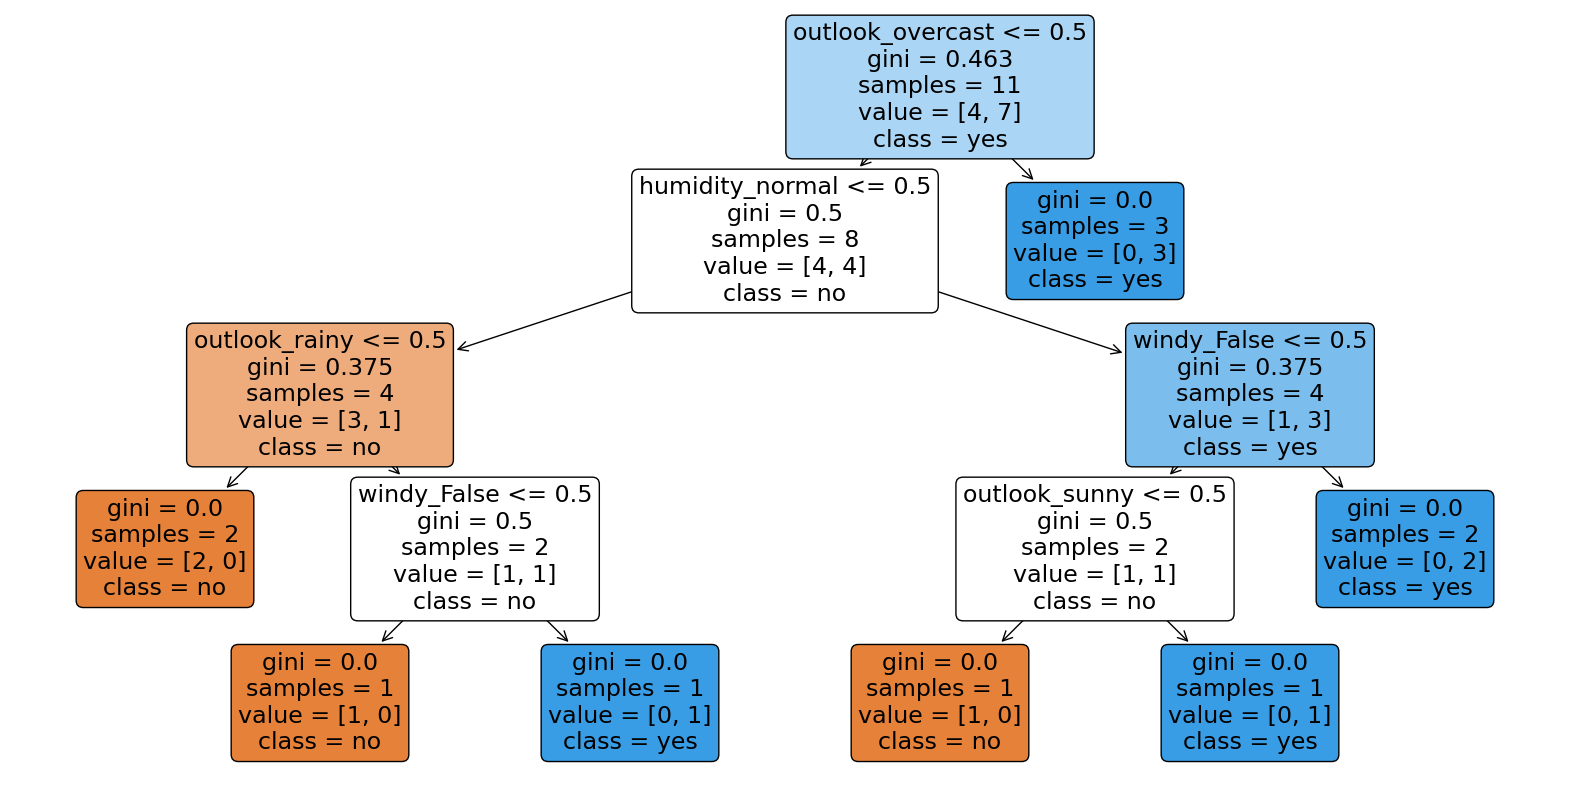


Max Depth tree:


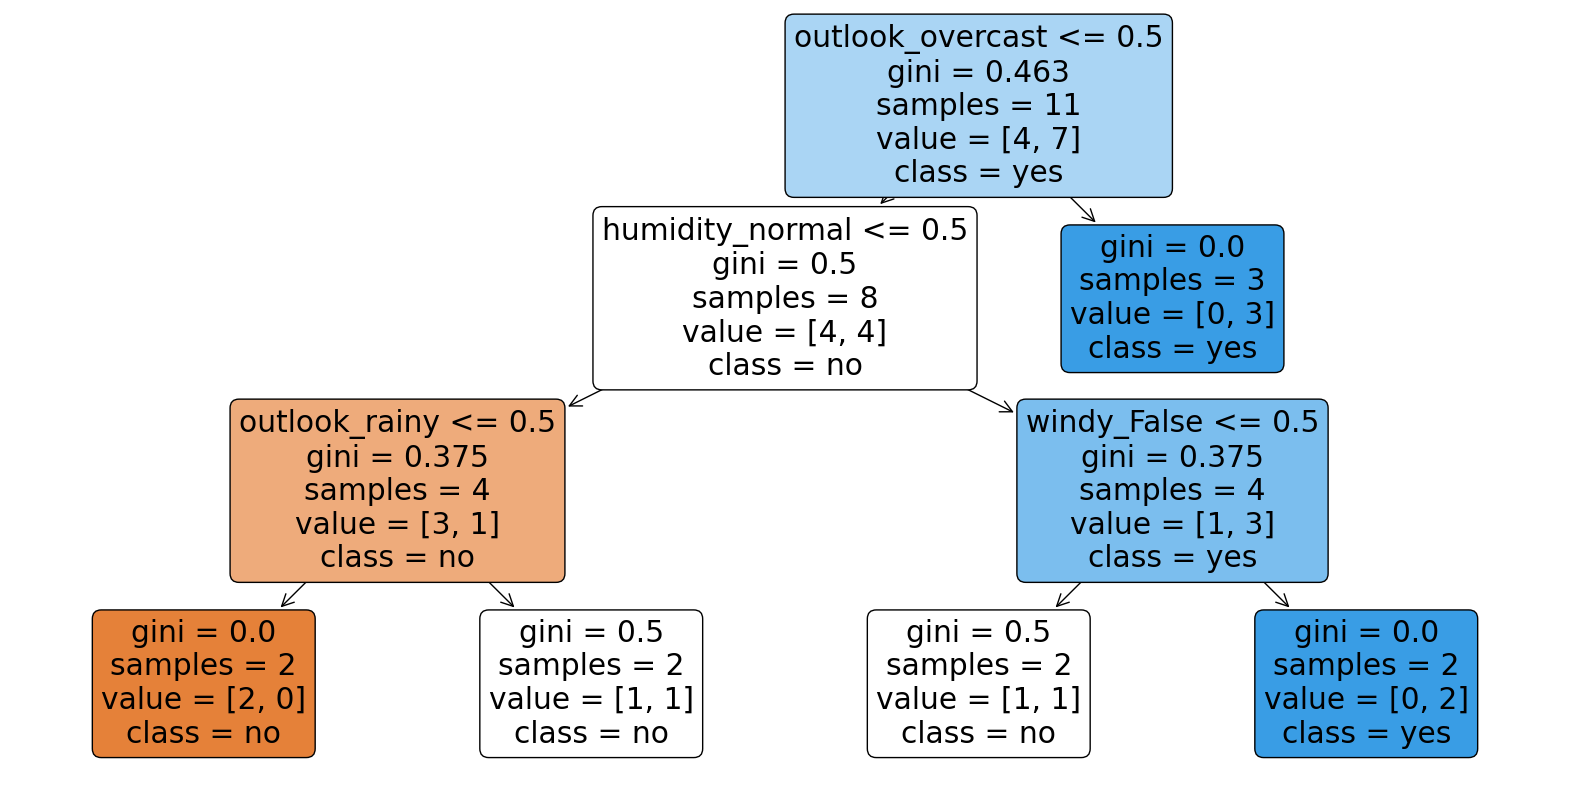


Min Samples Split tree:


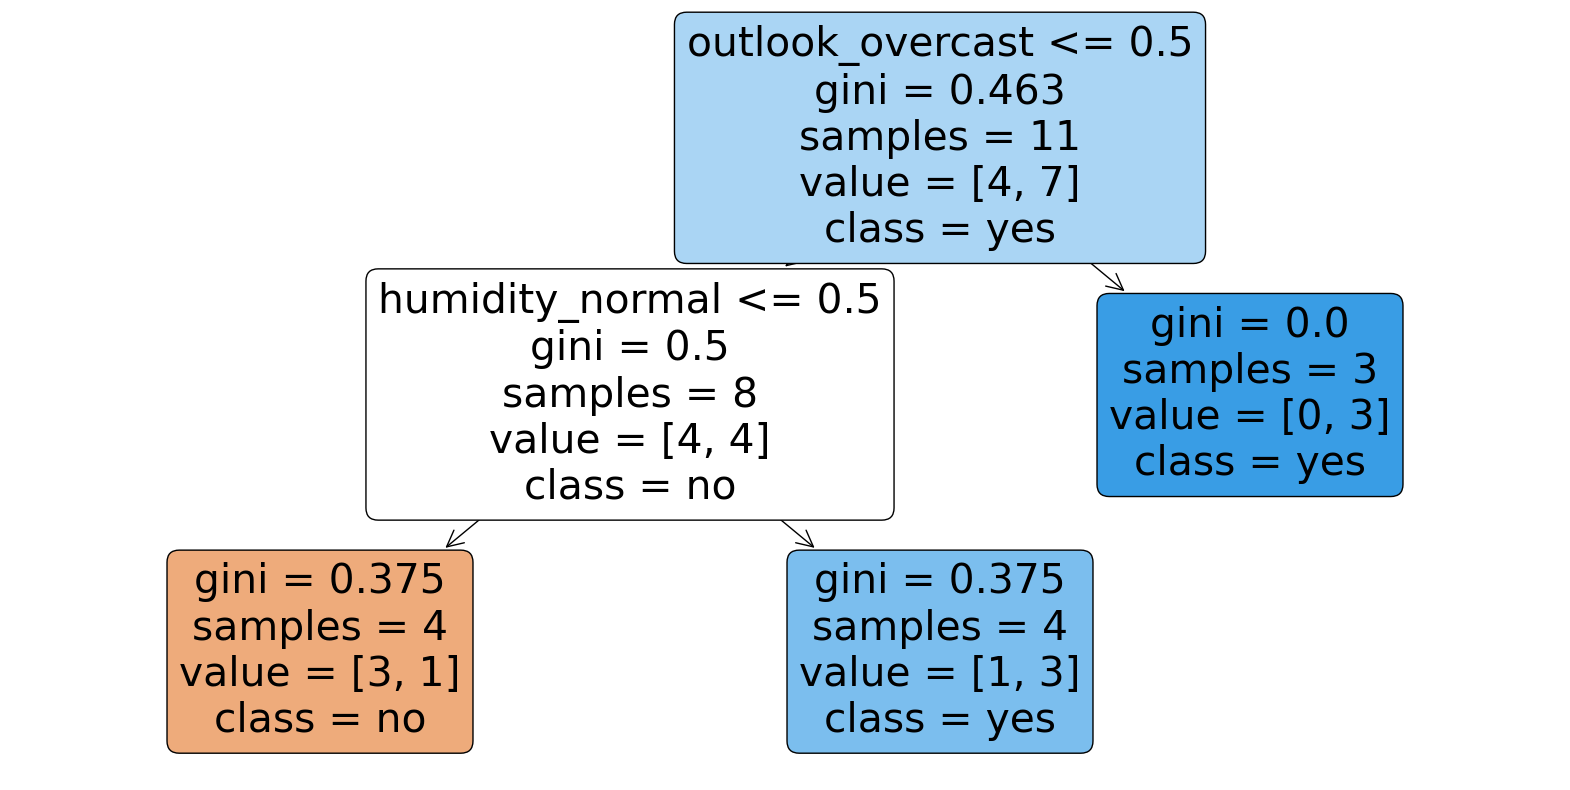


Min Samples Leaf tree:


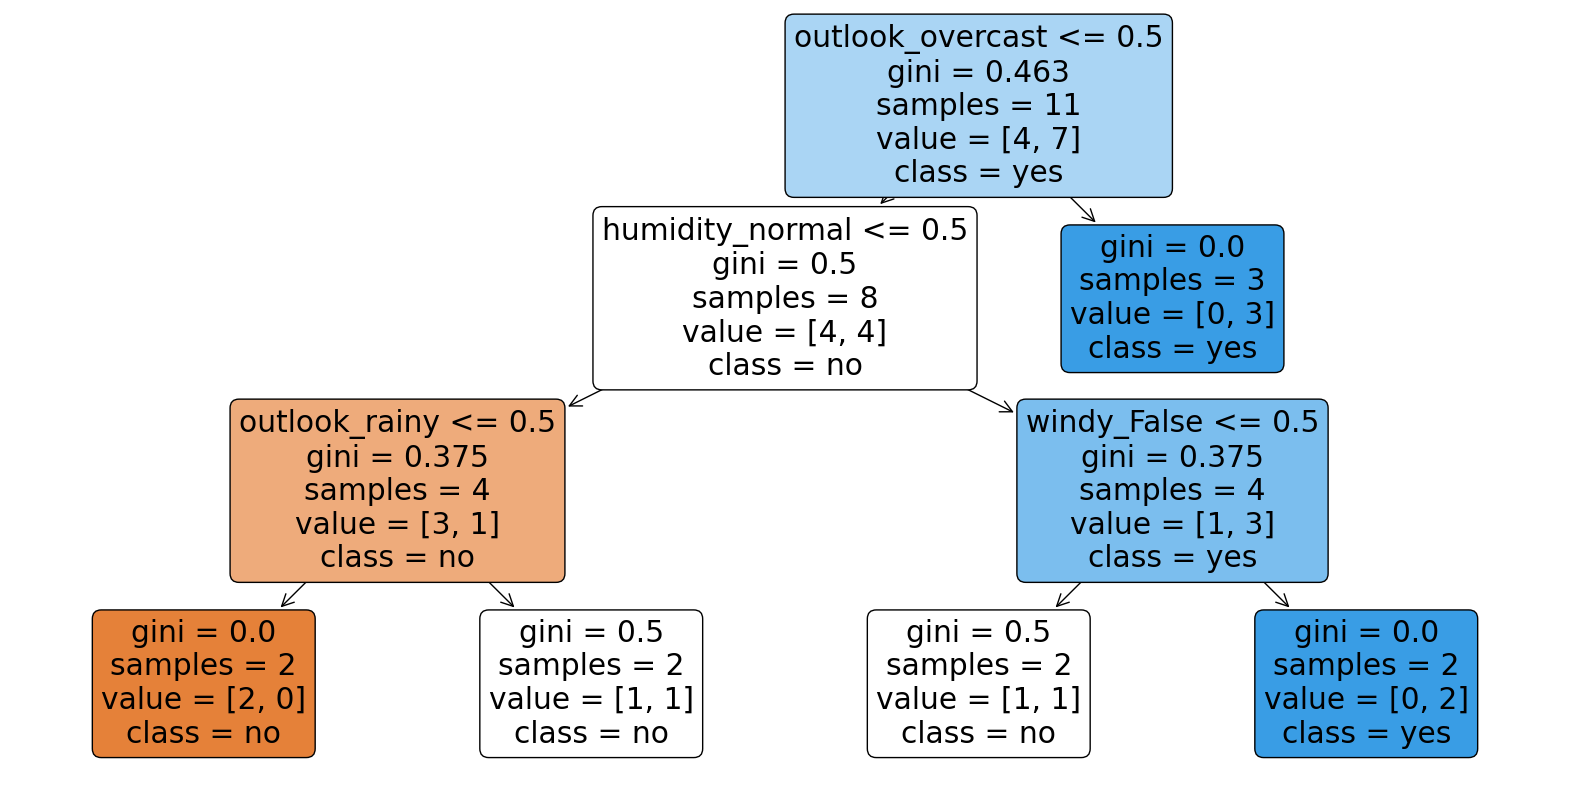


Max Features tree:


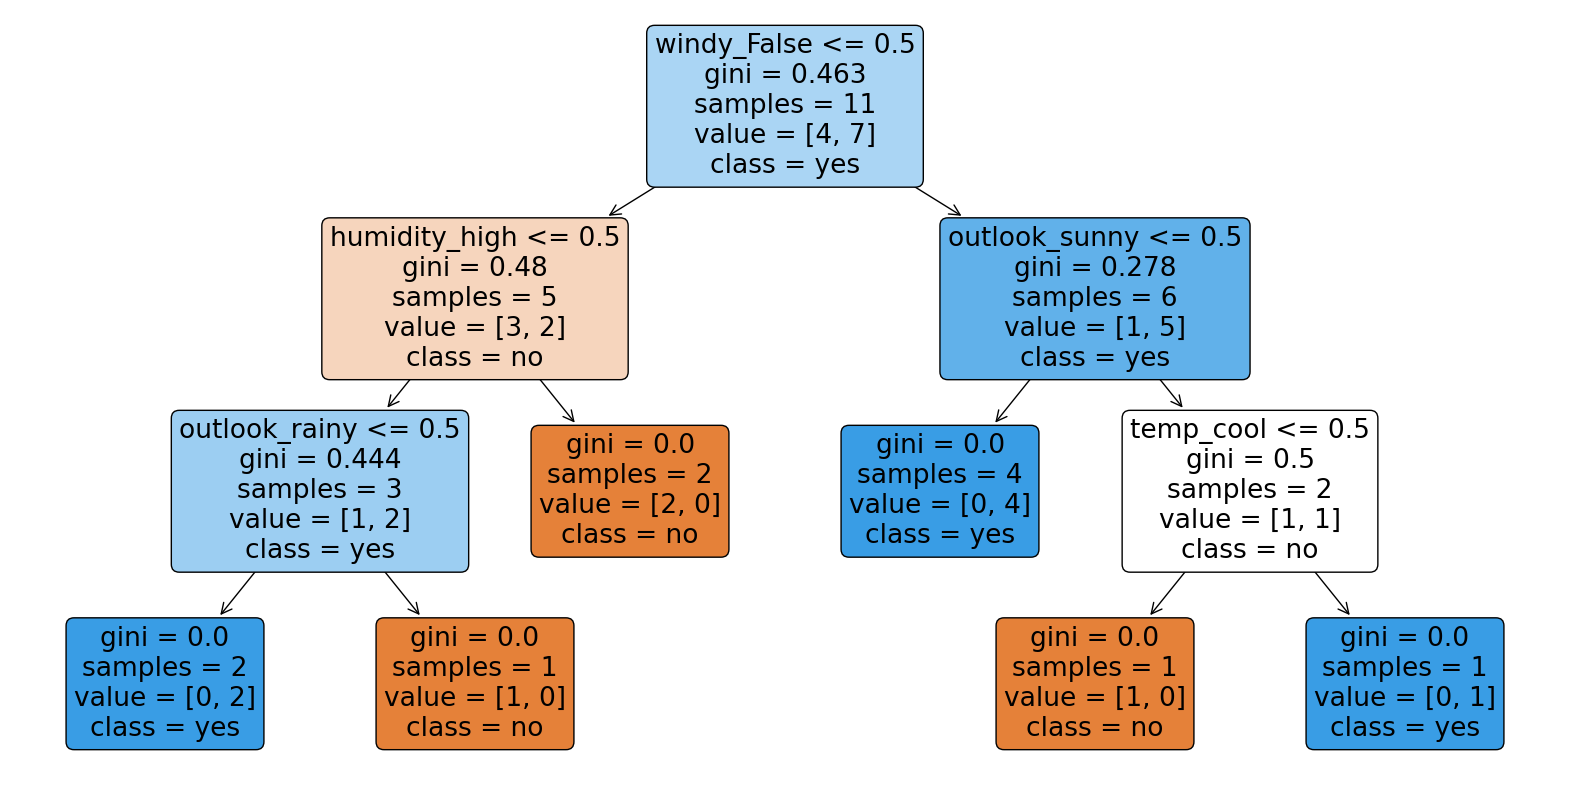


Max Leaf Nodes tree:


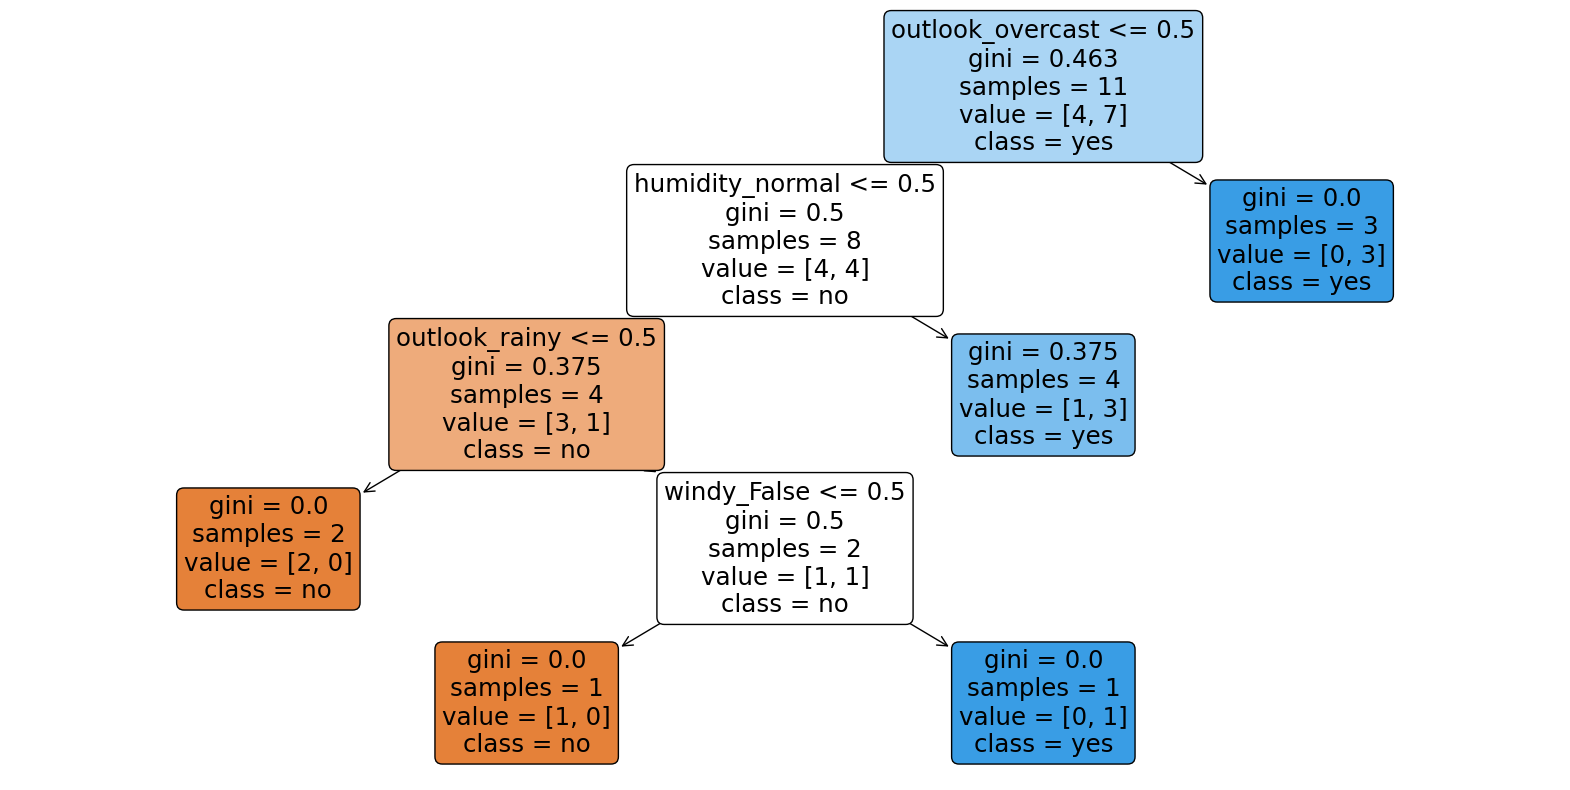


Comparative Analysis:
              Method  Accuracy
0         Base Model  1.000000
1          Max Depth  1.000000
2  Min Samples Split  1.000000
3   Min Samples Leaf  1.000000
4     Max Leaf Nodes  1.000000
5       Max Features  0.666667


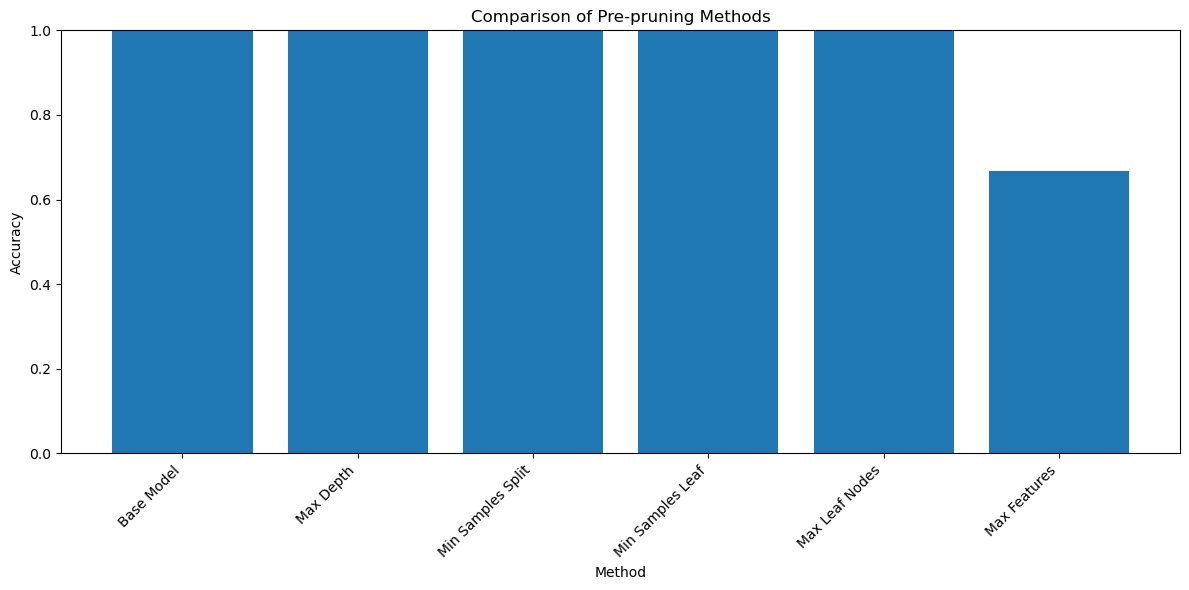

In [20]:
if __name__ == "__main__":
    # 1. Apply the CART decision tree
    base_model, base_accuracy = base_model()

    # 2. List pre-pruning methods
    pre_pruning_methods = list_pre_pruning_methods()

    # 3. Apply pre-pruning methods
    results = apply_pre_pruning_methods(pre_pruning_methods)

    # 4. Display trees
    display_trees(base_model, results)

    # 5. Comparative analysis
    comparative_analysis(base_accuracy, results)
